Importing Libraries

In [44]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


Data Exploration

In [45]:
!pip install yfinance

import yfinance as yf

# Download stock data for Microsoft (MSFT)
data = yf.download('MSFT', start='2019-01-01', end='2024-01-01')


# Display the first few rows of the dataframe
data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,99.550003,101.750000,98.940002,101.120003,95.673462,35329300
2019-01-03,100.099998,100.190002,97.199997,97.400002,92.153831,42579100
2019-01-04,99.720001,102.510002,98.930000,101.930000,96.439812,44060600
2019-01-07,101.639999,103.269997,100.980003,102.059998,96.562820,35656100
2019-01-08,103.040001,103.970001,101.709999,102.800003,97.262970,31514400


In [46]:
# Summary statistics
print("\nSummary statistics:")
data.describe()


Summary statistics:


,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,236.161208,238.610978,233.662464,236.259849,230.927155,2.943760e+07
std,72.390449,73.008324,71.709782,72.388476,73.190417,1.236255e+07
min,99.550003,100.190002,97.199997,97.400002,92.153831,8.989200e+06
25%,174.132500,175.212498,170.842506,174.132504,167.461948,2.163895e+07
50%,243.195000,245.300003,240.830002,243.014999,238.564468,2.642535e+07
75%,292.342514,295.117500,289.507492,293.379997,287.343689,3.342020e+07
max,383.760010,384.299988,378.160004,382.700012,381.305817,9.701270e+07


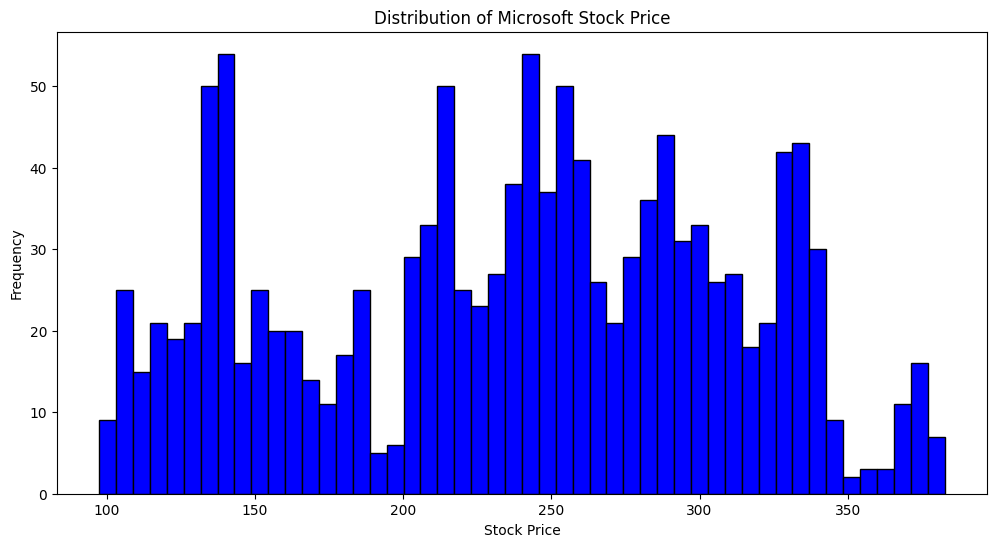

In [47]:
# Data distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.hist(data['Close'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Microsoft Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.show()

In [48]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [49]:
# Correlation analysis
correlation_matrix = data.corr()
print("\nCorrelation matrix:")
print(correlation_matrix)


Correlation matrix:
               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999505  0.999472  0.998829   0.998606 -0.088167
High       0.999505  1.000000  0.999311  0.999430   0.999233 -0.075934
Low        0.999472  0.999311  1.000000  0.999470   0.999232 -0.101844
Close      0.998829  0.999430  0.999470  1.000000   0.999758 -0.090207
Adj Close  0.998606  0.999233  0.999232  0.999758   1.000000 -0.090644
Volume    -0.088167 -0.075934 -0.101844 -0.090207  -0.090644  1.000000


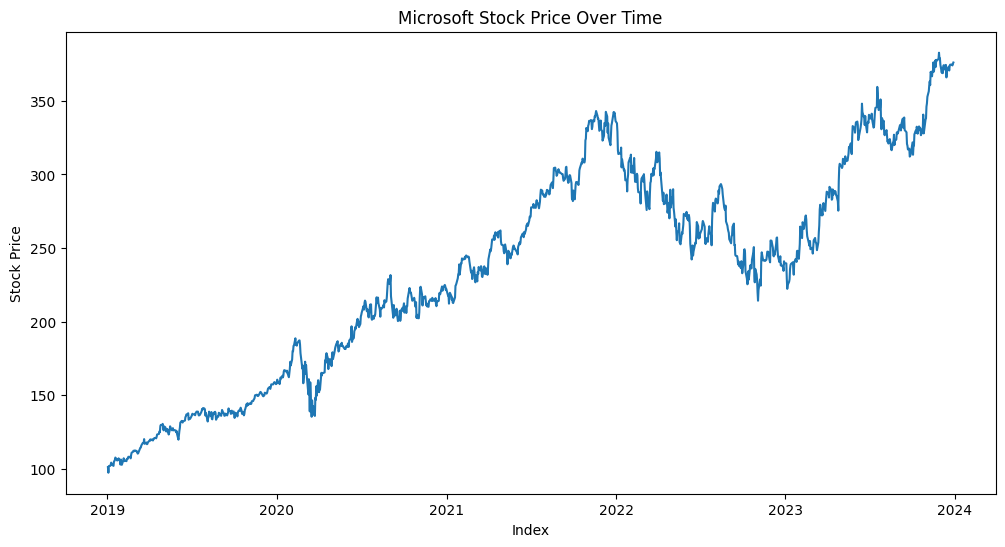

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'])
plt.title('Microsoft Stock Price Over Time')
plt.xlabel('Index')
plt.ylabel('Stock Price')
plt.show()


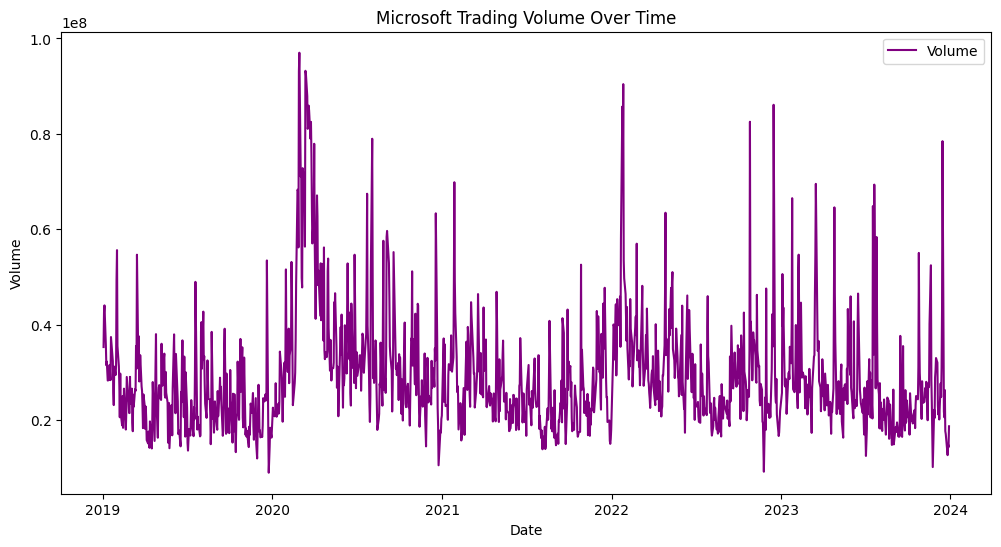

In [51]:
# Plot the trading volume over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Volume'], label='Volume', color='purple')
plt.title('Microsoft Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


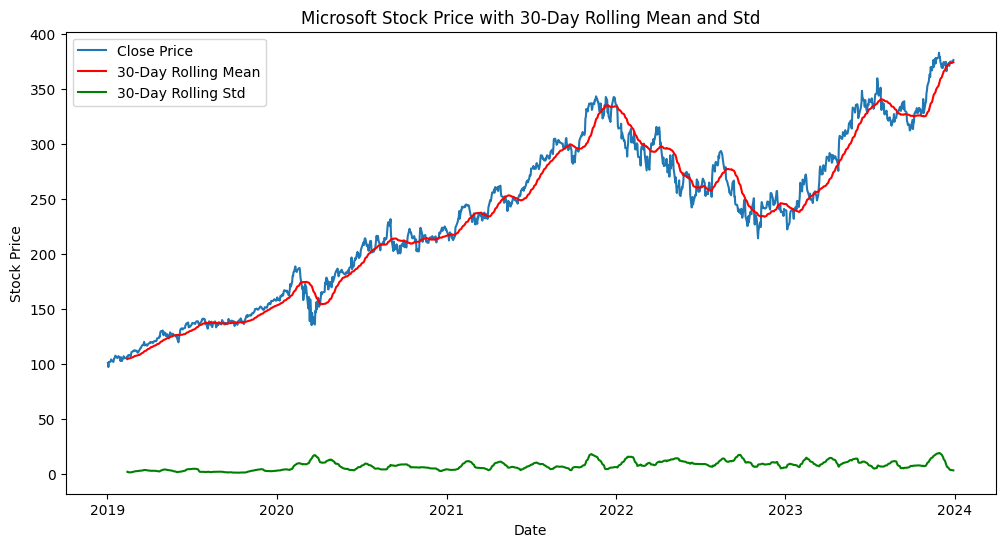

In [52]:
# Calculate and plot 30-day rolling mean and standard deviation of the closing price
data['Close_Rolling_Mean'] = data['Close'].rolling(window=30).mean()
data['Close_Rolling_Std'] = data['Close'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, data['Close_Rolling_Mean'], label='30-Day Rolling Mean', color='red')
plt.plot(data.index, data['Close_Rolling_Std'], label='30-Day Rolling Std', color='green')
plt.title('Microsoft Stock Price with 30-Day Rolling Mean and Std')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

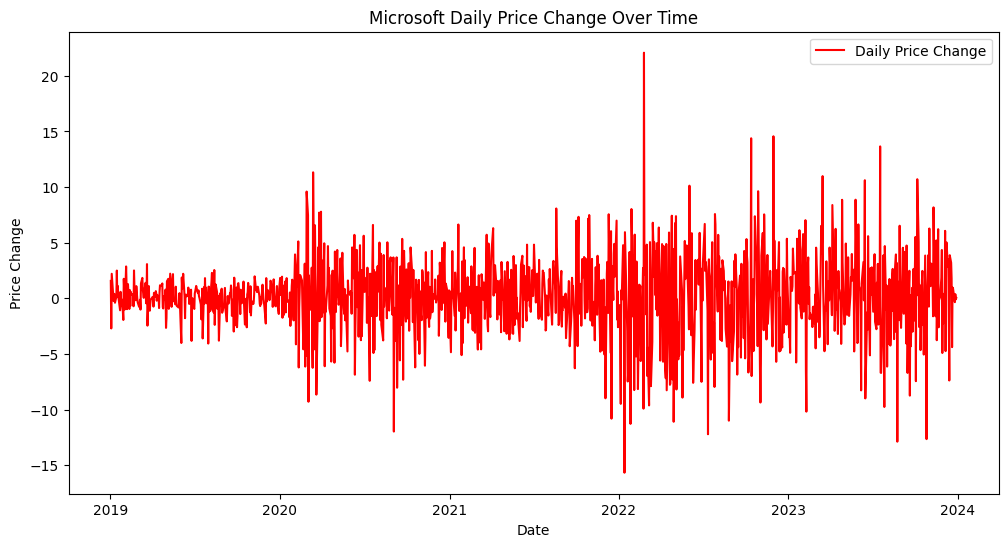

In [53]:
data['Daily_Price_Change'] = data['Close'] - data['Open']

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Daily_Price_Change'], label='Daily Price Change', color='red')
plt.title('Microsoft Daily Price Change Over Time')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.legend()
plt.show()


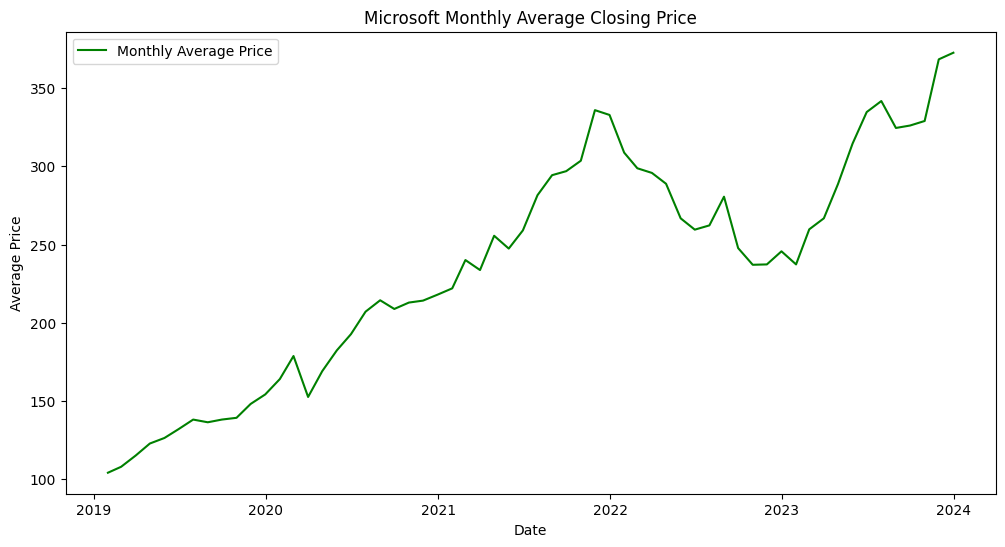

In [54]:
monthly_avg_price = data['Close'].resample('M').mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_price.index, monthly_avg_price.values, label='Monthly Average Price', color='green')
plt.title('Microsoft Monthly Average Closing Price')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.show()


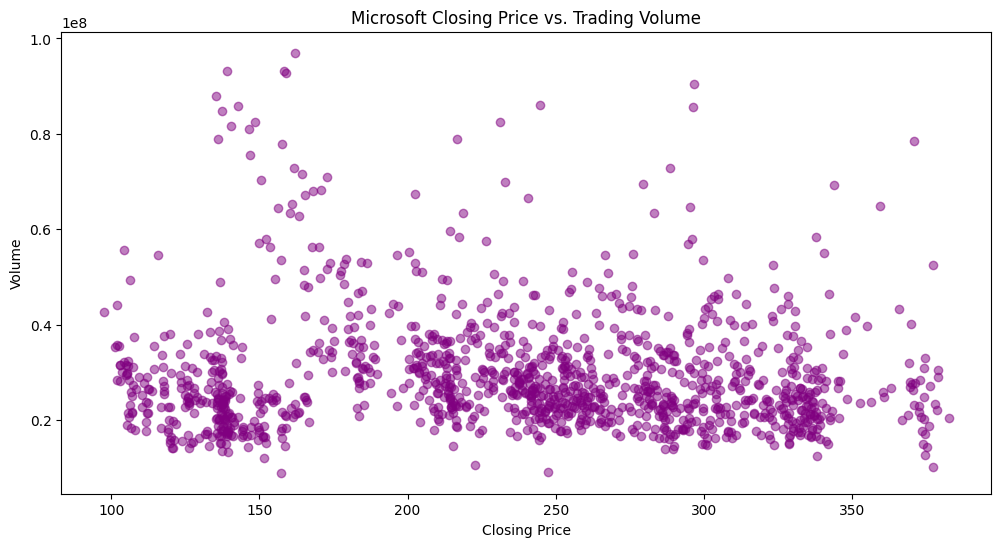

In [55]:
plt.figure(figsize=(12, 6))
plt.scatter(data['Close'], data['Volume'], color='purple', alpha=0.5)
plt.title('Microsoft Closing Price vs. Trading Volume')
plt.xlabel('Closing Price')
plt.ylabel('Volume')
plt.show()


<Figure size 1200x600 with 0 Axes>

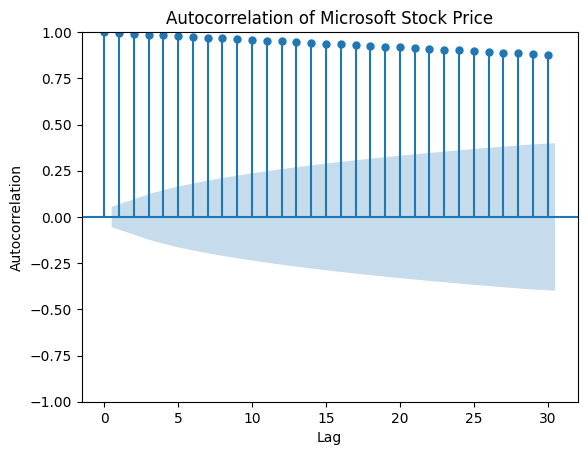

In [56]:
# Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(data['Close'], lags=30)
plt.title('Autocorrelation of Microsoft Stock Price')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

<Figure size 1200x600 with 0 Axes>

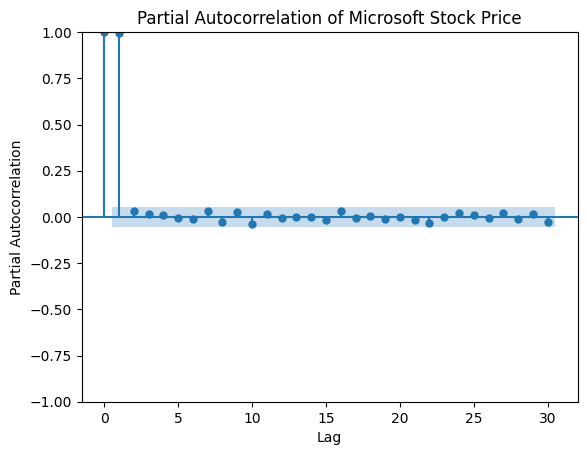

In [57]:
plt.figure(figsize=(12, 6))
plot_pacf(data['Close'], lags=30)
plt.title('Partial Autocorrelation of Microsoft Stock Price')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

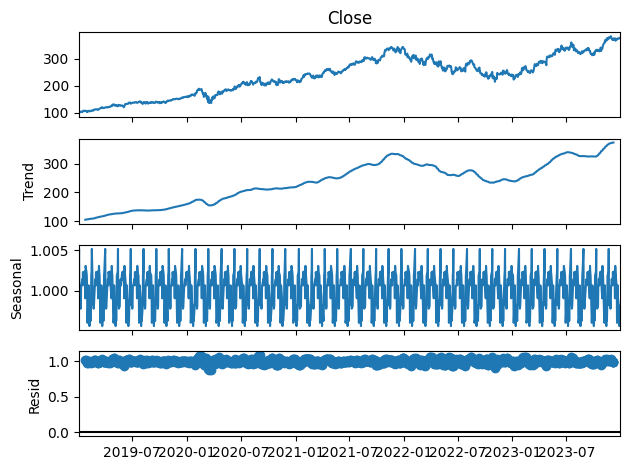

In [58]:
# Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Close'], model='multiplicative', period=30)
result.plot()
plt.show()

# Data Preprocessing

In [59]:
# Check for missing values
print(data.isnull().sum())

Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
Volume                 0
Close_Rolling_Mean    29
Close_Rolling_Std     29
Daily_Price_Change     0
dtype: int64


In [60]:
# Fill missing values with the mean of the column
data.fillna(data.mean(), inplace=True)

# Check if missing values are filled
print(data.isnull().sum())


Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
Close_Rolling_Mean    0
Close_Rolling_Std     0
Daily_Price_Change    0
dtype: int64


In [61]:
# Check for duplicates
duplicates = data.duplicated()
print("Number of duplicates:", duplicates.sum())

# Drop duplicates if any
data = data.drop_duplicates()

# Check if data is clean
print("\nData is clean." if not data.duplicated().any() else "\nData still contains duplicates.")


Number of duplicates: 0

Data is clean.


In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])


In [63]:
# Create a 30-day moving average
data['Close_30_MA'] = data['Close'].rolling(window=30).mean()

# Create lagged values
data['Close_Lag1'] = data['Close'].shift(1)
data['Close_Lag7'] = data['Close'].shift(7)


In [64]:
# Assuming you want to predict the 'Close' price
X = data.drop(['Close'], axis=1)
y = data['Close']

# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the training data back to a DataFrame for ARIMA fitting
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)


ARIMA

In [65]:

# Fit the Univariate ARIMA model
model_arima = ARIMA(train['Close'], order=(5, 1, 0))
model_arima_fit = model_arima.fit()

# Print the summary of the ARIMA model
print(model_arima_fit.summary())

# Fit the Multivariate ARIMA (ARIMAX) model using 'Volume' as an exogenous variable
model_arimax = ARIMA(train['Close'], exog=train[['Volume']], order=(5, 1, 0))
model_arimax_fit = model_arimax.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1006
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -121.882
Date:                Sun, 02 Jun 2024   AIC                            255.765
Time:                        10:48:09   BIC                            285.241
Sample:                             0   HQIC                           266.965
                               - 1006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7997      0.032    -25.122      0.000      -0.862      -0.737
ar.L2         -0.6635      0.040    -16.765      0.000      -0.741      -0.586
ar.L3         -0.4814      0.043    -11.288      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

SARIMA

In [66]:
#Cell 3: Univariate SARIMA
model_sarima = SARIMAX(train['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit()

# Cell 4: Multivariate SARIMA (SARIMAX)
model_sarimax = SARIMAX(train['Close'], exog=train[['Volume']], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_sarimax_fit = model_sarimax.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [67]:
# Cell 5: VAR model
model_var = VAR(train[['Close', 'Volume']])
model_var_fit = model_var.fit()

# Cell 6: VARMAX model
model_varmax = VARMAX(train[['Close', 'Volume']], order=(1, 1))
model_varmax_fit = model_varmax.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr

In [68]:
# Cell 7: Make predictions
predictions_arima = model_arima_fit.forecast(steps=len(test))
predictions_arimax = model_arimax_fit.forecast(steps=len(test), exog=test[['Volume']])
predictions_sarima = model_sarima_fit.forecast(steps=len(test))
predictions_sarimax = model_sarimax_fit.forecast(steps=len(test), exog=test[['Volume']])
predictions_varmax = model_varmax_fit.forecast(steps=len(test))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/u

In [69]:
# Cell 8: Evaluate models
rmse_arima = mean_squared_error(test['Close'], predictions_arima, squared=False)
rmse_arimax = mean_squared_error(test['Close'], predictions_arimax, squared=False)
rmse_sarima = mean_squared_error(test['Close'], predictions_sarima, squared=False)
rmse_sarimax = mean_squared_error(test['Close'], predictions_sarimax, squared=False)
rmse_varmax = mean_squared_error(test['Close'], predictions_varmax['Close'], squared=False)


In [70]:
print("RMSE for ARIMA:", rmse_arima)
print("RMSE for ARIMAX:", rmse_arimax)
print("RMSE for SARIMA:", rmse_sarima)
print("RMSE for SARIMAX:", rmse_sarimax)
print("RMSE for VARMAX:", rmse_varmax)

RMSE for ARIMA: 0.34684077460726925
RMSE for ARIMAX: 0.33444678933404676
RMSE for SARIMA: 0.25506695136541524
RMSE for SARIMAX: 0.25464940124719115
RMSE for VARMAX: 0.25407802561306014


In [71]:
# Univariate ARIMA
model_arima = ARIMA(data['Close'], order=(5, 1, 0))
model_arima_fit = model_arima.fit()
print("ARIMA Model Summary:")
print(model_arima_fit.summary())

# Multivariate ARIMA (ARIMAX)
model_arimax = ARIMA(data['Close'], exog=data[['Volume']], order=(5, 1, 0))
model_arimax_fit = model_arimax.fit()
print("\nARIMAX Model Summary:")
print(model_arimax_fit.summary())

# Univariate SARIMA
model_sarima = SARIMAX(data['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit()
print("\nSARIMA Model Summary:")
print(model_sarima_fit.summary())

# Multivariate SARIMA (SARIMAX)
model_sarimax = SARIMAX(data['Close'], exog=data[['Volume']], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_sarimax_fit = model_sarimax.fit()
print("\nSARIMAX Model Summary:")
print(model_sarimax_fit.summary())

# VAR model
model_var = VAR(data[['Close', 'Volume']])
model_var_fit = model_var.fit()
print("\nVAR Model Summary:")
print(model_var_fit.summary())

# VARMAX model
model_varmax = VARMAX(data[['Close', 'Volume']], order=(1, 1))
model_varmax_fit = model_varmax.fit()
print("\nVARMAX Model Summary:")
print(model_varmax_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1258
Model:                 ARIMA(5, 1, 0)   Log Likelihood                3471.785
Date:                Sun, 02 Jun 2024   AIC                          -6931.570
Time:                        10:49:11   BIC                          -6900.751
Sample:                             0   HQIC                         -6919.988
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1073      0.021     -5.096      0.000      -0.149      -0.066
ar.L2         -0.0275      0.022     -1.259      0.208      -0.070       0.015
ar.L3         -0.0343      0.02

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



ARIMAX Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1258
Model:                 ARIMA(5, 1, 0)   Log Likelihood                3476.357
Date:                Sun, 02 Jun 2024   AIC                          -6938.715
Time:                        10:49:13   BIC                          -6902.759
Sample:                             0   HQIC                         -6925.202
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume        -0.0122      0.003     -4.711      0.000      -0.017      -0.007
ar.L1         -0.1159      0.021     -5.486      0.000      -0.157      -0.075
ar.L2         -0.0248      0.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



SARIMA Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1258
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                3409.044
Date:                            Sun, 02 Jun 2024   AIC                          -6808.088
Time:                                    10:49:26   BIC                          -6782.453
Sample:                                         0   HQIC                         -6798.449
                                           - 1258                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2671      0.174      1.531      0.126      -0.075       0.609
ma.L1       

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



SARIMAX Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1258
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                3413.025
Date:                            Sun, 02 Jun 2024   AIC                          -6814.050
Time:                                    10:49:46   BIC                          -6783.289
Sample:                                         0   HQIC                         -6802.484
                                           - 1258                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume        -0.0123      0.003     -4.547      0.000      -0.018      -0.007
ar.L1      

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



VARMAX Model Summary:
                            Statespace Model Results                           
Dep. Variable:     ['Close', 'Volume']   No. Observations:                 1258
Model:                      VARMA(1,1)   Log Likelihood                4588.358
                           + intercept   AIC                          -9150.717
Date:                 Sun, 02 Jun 2024   BIC                          -9083.932
Time:                         10:49:53   HQIC                         -9125.618
Sample:                              0                                         
                                - 1258                                         
Covariance Type:                   opg                                         
Ljung-Box (L1) (Q):             0.02, 1.94   Jarque-Bera (JB):      280.68, 1545.58
Prob(Q):                        0.90, 0.16   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         2.36, 1.05   Skew:                      -0.19, 1.35
Prob(

# Lower RMSE values show the best performance

In [72]:
# Prepare the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Close']].values)

In [73]:
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

In [74]:
time_steps = 30
X, y = create_dataset(scaled_data, time_steps)

X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM/GRU

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

In [75]:
# Define and build the LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
31/31 [==============================] - 6s 63ms/step - loss: 0.0360
Epoch 2/100
31/31 [==============================] - 2s 59ms/step - loss: 0.0020
Epoch 3/100
31/31 [==============================] - 1s 41ms/step - loss: 0.0010
Epoch 4/100
31/31 [==============================] - 1s 34ms/step - loss: 0.0011
Epoch 5/100
31/31 [==============================] - 1s 35ms/step - loss: 0.0010
Epoch 6/100
31/31 [==============================] - 1s 36ms/step - loss: 9.7131e-04
Epoch 7/100
31/31 [==============================] - 1s 36ms/step - loss: 9.8738e-04
Epoch 8/100
31/31 [==============================] - 1s 34ms/step - loss: 9.2356e-04
Epoch 9/100
31/31 [==============================] - 1s 33ms/step - loss: 9.5830e-04
Epoch 10/100
31/31 [==============================] - 1s 33ms/step - loss: 9.1309e-04
Epoch 11/100
31/31 [==============================] - 1s 33ms/step - loss: 9.8313e-04
Epoch 12/100
31/31 [==============================] - 1s 41ms/step - loss: 9.3771e-

In [76]:
# Define and build the GRU model
gru_model = Sequential([
    GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    GRU(50),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the GRU model
gru_model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
31/31 [==============================] - 6s 35ms/step - loss: 0.0447
Epoch 2/100
31/31 [==============================] - 1s 34ms/step - loss: 0.0027
Epoch 3/100
31/31 [==============================] - 2s 56ms/step - loss: 5.2603e-04
Epoch 4/100
31/31 [==============================] - 2s 61ms/step - loss: 4.4904e-04
Epoch 5/100
31/31 [==============================] - 1s 41ms/step - loss: 4.2265e-04
Epoch 6/100
31/31 [==============================] - 1s 34ms/step - loss: 4.0602e-04
Epoch 7/100
31/31 [==============================] - 1s 34ms/step - loss: 3.9571e-04
Epoch 8/100
31/31 [==============================] - 1s 34ms/step - loss: 3.8388e-04
Epoch 9/100
31/31 [==============================] - 1s 34ms/step - loss: 3.7395e-04
Epoch 10/100
31/31 [==============================] - 1s 35ms/step - loss: 3.7970e-04
Epoch 11/100
31/31 [==============================] - 1s 36ms/step - loss: 3.5741e-04
Epoch 12/100
31/31 [==============================] - 1s 36ms/step - lo

In [77]:
# Define and build the CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the CNN model
cnn_model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
31/31 [==============================] - 1s 5ms/step - loss: 0.0152
Epoch 2/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 3/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 4/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 5/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 6/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - loss: 9.6849e-04
Epoch 8/100
31/31 [==============================] - 0s 4ms/step - loss: 8.6938e-04
Epoch 9/100
31/31 [==============================] - 0s 4ms/step - loss: 8.1182e-04
Epoch 10/100
31/31 [==============================] - 0s 4ms/step - loss: 7.3826e-04
Epoch 11/100
31/31 [==============================] - 0s 4ms/step - loss: 6.6686e-04
Epoch 12/100
31/31 [==============================] - 0s 4ms/step - loss: 6.4683e-04
Epoch 13/100


In [78]:
#Make predictions
lstm_predictions = lstm_model.predict(X_test)
gru_predictions = gru_model.predict(X_test)
cnn_predictions = cnn_model.predict(X_test)

# Calculate RMSE for each model
def calculate_rmse(predictions, y_true):
    return np.sqrt(mean_squared_error(predictions, y_true))

rmse_lstm = calculate_rmse(lstm_predictions, y_test)
rmse_gru = calculate_rmse(gru_predictions, y_test)
rmse_cnn = calculate_rmse(cnn_predictions, y_test)

print("RMSE for LSTM:", rmse_lstm)
print("RMSE for GRU:", rmse_gru)
print("RMSE for CNN:", rmse_cnn)

8/8 [==============================] - 0s 5ms/step
RMSE for LSTM: 0.022208643331984277
RMSE for GRU: 0.016592456458969722
RMSE for CNN: 0.019864818475321403


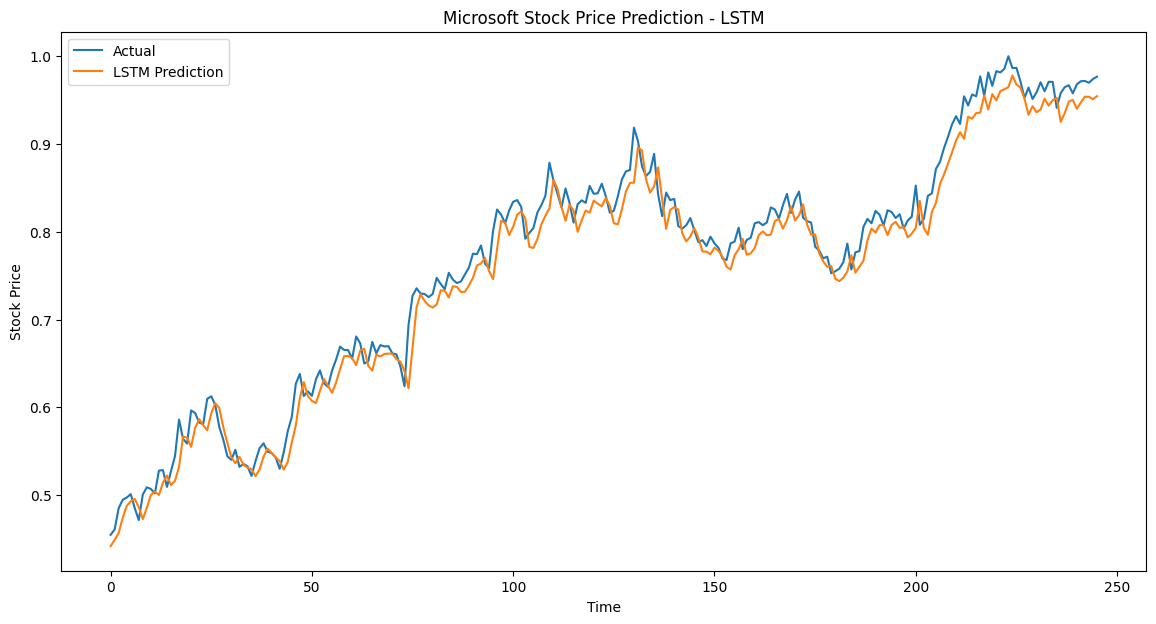

In [87]:
# Visualize predictions for LSTM
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual')
plt.plot(lstm_predictions, label='LSTM Prediction')
plt.title('Microsoft Stock Price Prediction - LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

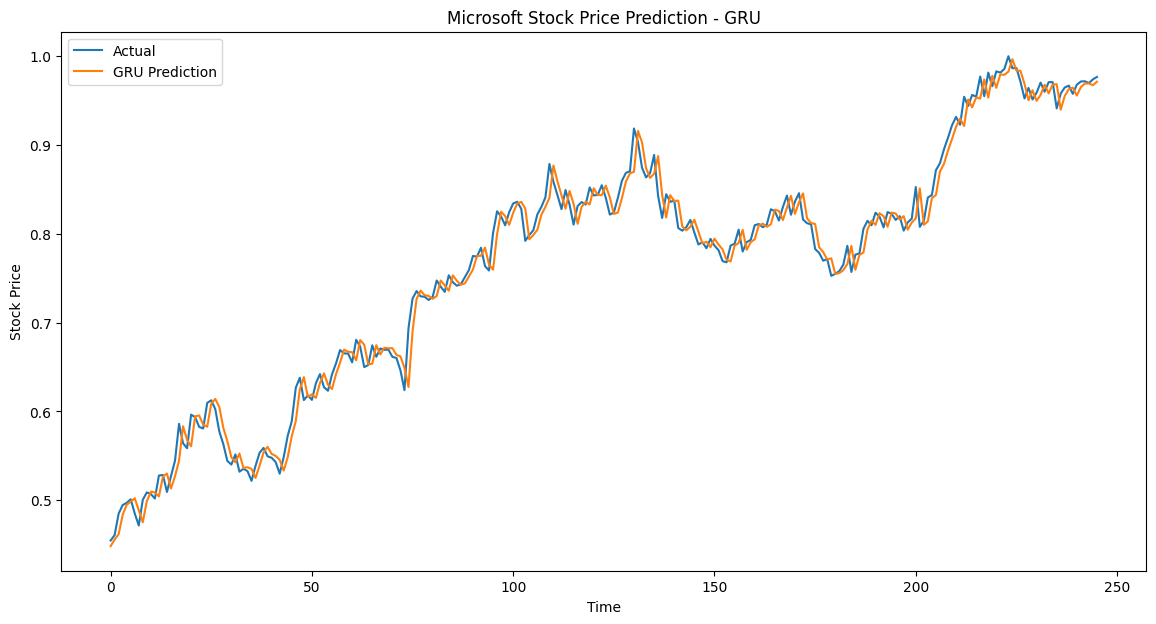

In [82]:
# Visualize predictions for GRU
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual')
plt.plot(gru_predictions, label='GRU Prediction')
plt.title('Microsoft Stock Price Prediction - GRU')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

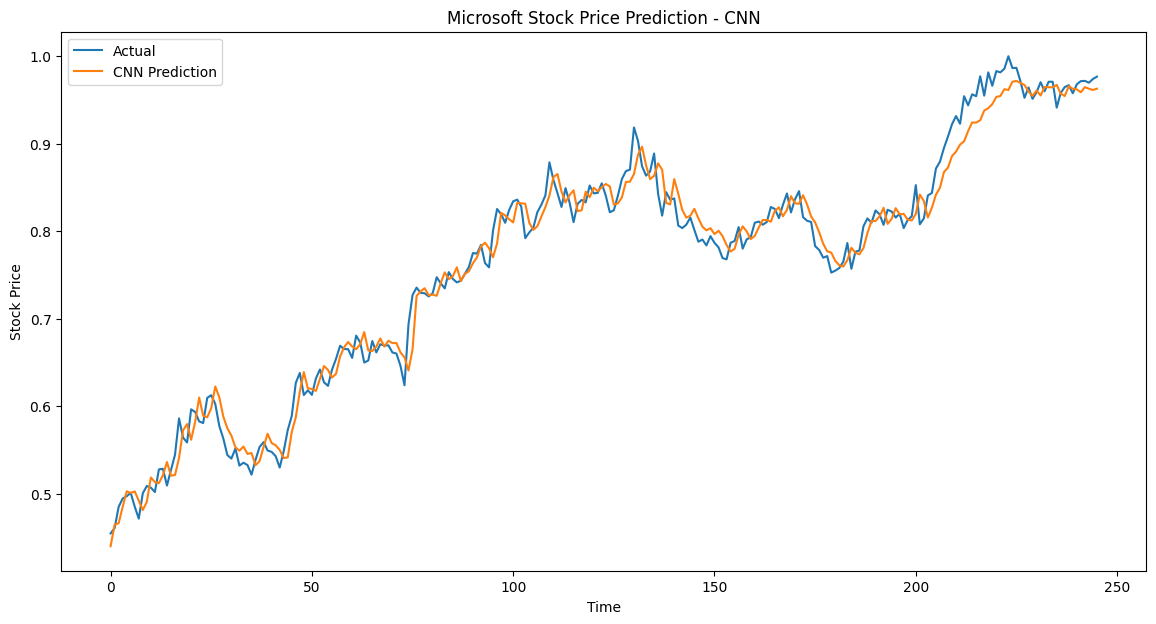

In [81]:
# Visualize predictions for CNN
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual')
plt.plot(cnn_predictions, label='CNN Prediction')
plt.title('Microsoft Stock Price Prediction - CNN')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

For stock price prediction, which is inherently a regression task, the primary metric of interest is usually the RMSE (Root Mean Squared Error). RMSE measures the average magnitude of the errors between predicted and actual values and is particularly useful in regression problems where we are concerned with how close our predictions are to the actual stock prices.

Given that we are focusing on regression:

RMSE is the most relevant metric. Metrics like accuracy, precision, recall, and F1 score are more suitable for classification tasks and less meaningful for regression tasks.<br>
# **Comparison Based on RMSE**<br>
LSTM RMSE: 0.0222<br>
GRU RMSE: 0.0166<br>
CNN RMSE: 0.0199<br>

# **Conclusion**
Based on RMSE, the GRU model performs the best for stock price prediction as it has the lowest RMSE value. The GRU model provides the most accurate predictions in terms of minimizing the error between predicted and actual stock prices.